Problem Statement                                                                                                             
Football (Soccer) in the modern times has become much complicated, then it ever was. For clubs all around the world, it’s 
not just about playing your heart out in the field, but also perform well in the transfer markets, to snap up the right talent 
and players for their sides, at the right price. Over the past few years, we have observed a serious inflation in player values 
and some exuberant release clauses (price inserted in a player’s contract with his/her current club for which he/she can be 
bought by another club). As a result of this, a many clubs end up paying a lot more for a player whose talent and performances 
on the field fail to justify his/her price tag. A similar problem is faced by the club selling a player, where they fail to 
realize his/her potential, and let him/her go for a price which was way less than the actual price they should have asked for. 
We shall try to solve this as a regression problem using Machine Learning. We will be making use of the linear regression model 
to predict a player’s value based on his/her skill and personality attributes.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the csv
fifa = pd.read_csv('players_21.csv')

In [3]:
fifa

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


In [4]:
fifa.shape

(18944, 106)

In [5]:
# checking column names
features = list(fifa.columns)
features

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club_name',
 'league_name',
 'league_rank',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed

In [6]:
# checking null values in each columns
null_columns=fifa.columns[fifa.isnull().any()]
fifa[null_columns].isnull().sum()

club_name                 225
league_name               225
league_rank               225
release_clause_eur        995
player_tags             17536
team_position             225
team_jersey_number        225
loaned_from             18186
joined                    983
contract_valid_until      225
nation_position         17817
nation_jersey_number    17817
pace                     2083
shooting                 2083
passing                  2083
dribbling                2083
defending                2083
physic                   2083
gk_diving               16861
gk_handling             16861
gk_kicking              16861
gk_reflexes             16861
gk_speed                16861
gk_positioning          16861
player_traits           10629
defending_marking       18944
dtype: int64

<AxesSubplot:>

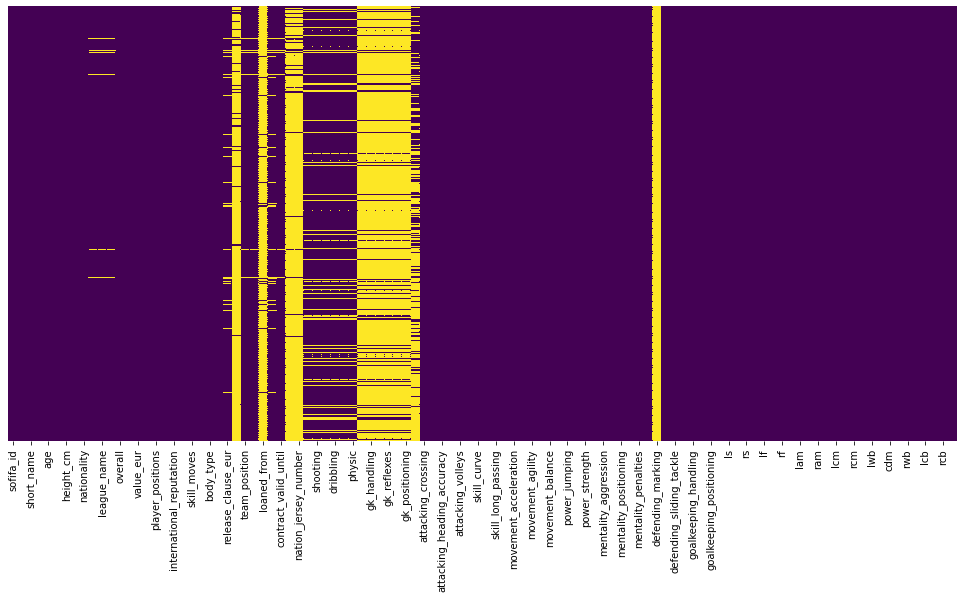

In [7]:
plt.figure(figsize=(17,8))
sns.heatmap(fifa.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Data Cleaning

>Droping rows where club_name, league_name and league_rank is null as these players will have very less effect on our analysis

In [8]:
fifa_1 = fifa.dropna(subset=['club_name'])

In [9]:
null_columns=fifa_1.columns[fifa_1.isnull().any()]
fifa_1[null_columns].isnull().sum()

release_clause_eur        770
player_tags             17334
loaned_from             17961
joined                    758
nation_position         17817
nation_jersey_number    17817
pace                     2053
shooting                 2053
passing                  2053
dribbling                2053
defending                2053
physic                   2053
gk_diving               16666
gk_handling             16666
gk_kicking              16666
gk_reflexes             16666
gk_speed                16666
gk_positioning          16666
player_traits           10533
defending_marking       18719
dtype: int64

>For the loaned_from column, we will create another column, loaned_status. Instead of blank values and the club names the player are loaned to, we will use 0 for not loaned and 1 for loaned.

In [10]:
fifa_1['loaned_status'] = fifa_1['loaned_from'].fillna('').apply(lambda x:0 if x == '' else 1)

In [11]:
features_1 = list(fifa_1.columns)
features_1

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club_name',
 'league_name',
 'league_rank',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed

<AxesSubplot:>

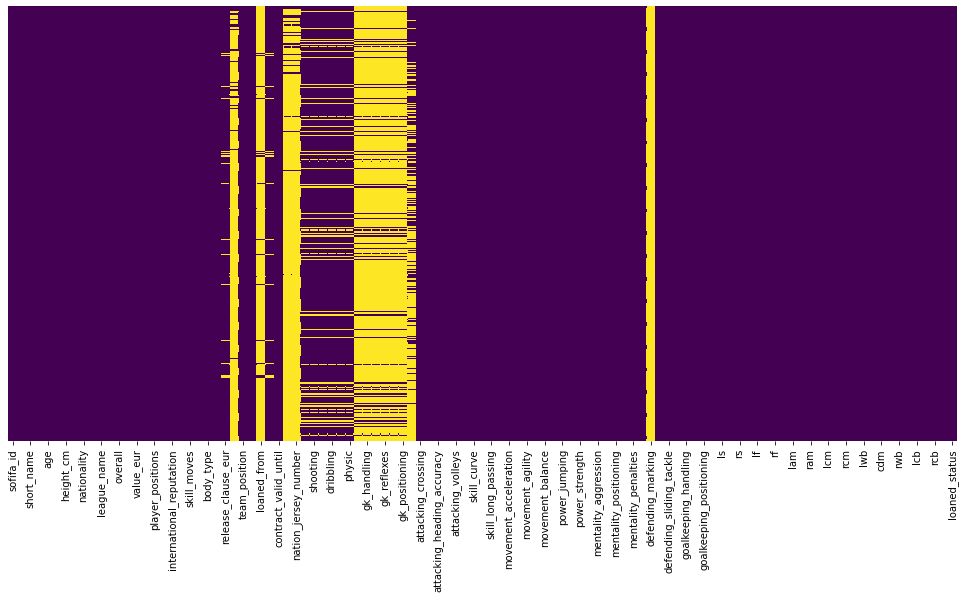

In [12]:
plt.figure(figsize=(17,8))
sns.heatmap(fifa_1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

>Players that dont have a release clause in there contracts are replaced by 0 in the release_clause_eur column

In [13]:
fifa_1['release_clause_eur'] = fifa_1['release_clause_eur'].fillna('').apply(lambda x: 0 if x == '' else x)

>Droping columns i.e. player_tags, nation_position, nation_jersey_number, player_traits, defending_marking because these columns contain a lot of null entries and are also very less relivent to our analysis 

In [14]:
fifa_1.drop(['player_tags', 'nation_position','nation_jersey_number', 'player_traits', 'defending_marking'], axis = 1, inplace=True)

>Droping columns i.e. 'sofifa_id', 'player_url', 'long_name','dob' because these columns consists of unique entries

In [15]:
fifa_1.drop(['sofifa_id', 'player_url', 'long_name','dob'], axis = 1, inplace=True)

In [16]:
fifa_1.shape

(18719, 98)

>Players that are not on loan having null values in loaned_from column is replaced by 'Not on loan' in the loaned_from column

In [17]:
fifa_1['loaned_from'] = fifa_1['loaned_from'].fillna('').apply(lambda x: 'Not on loan' if x == '' else x)

In [18]:
null_columns=fifa_1.columns[fifa_1.isnull().any()]
fifa_1[null_columns].isnull().sum()

joined              758
pace               2053
shooting           2053
passing            2053
dribbling          2053
defending          2053
physic             2053
gk_diving         16666
gk_handling       16666
gk_kicking        16666
gk_reflexes       16666
gk_speed          16666
gk_positioning    16666
dtype: int64

>Players that does not have a joining date at their current club is replaced by '1/8/2017' because an average contract size in europe and latin america is 4 years, hence a 4 year prior date

In [19]:
fifa_1['joined'] = fifa_1['joined'].fillna('').apply(lambda x: '1/8/2017' if x == '' else x)

>Cleanng the following position related columns using split on '+' and the selecting the first element from it

In [20]:
col = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb',]

In [21]:
for c in col:
    fifa_1[c]=fifa_1[c].str.split('+',n=1,expand = True)[0]

fifa_1[col]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,92,93,93,93,92,93,93,...,66,65,65,65,66,62,52,52,52,62
1,91,91,91,89,91,91,91,89,88,88,...,65,61,61,61,65,61,54,54,54,61
2,33,33,33,32,35,35,35,32,38,38,...,32,36,36,36,32,32,33,33,33,32
3,89,89,89,85,87,87,87,85,85,85,...,64,65,65,65,64,61,60,60,60,61
4,84,84,84,90,89,89,89,90,90,90,...,67,62,62,62,67,62,49,49,49,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,44,44,44,47,45,45,45,47,47,47,...,47,47,47,47,47,47,46,46,46,47
18940,32,32,32,30,30,30,30,30,29,29,...,42,41,41,41,42,45,47,47,47,45
18941,34,34,34,33,33,33,33,33,33,33,...,42,42,42,42,42,44,47,47,47,44
18942,44,44,44,46,45,45,45,46,47,47,...,47,49,49,49,47,47,49,49,49,47


>Now separating our fifa_1 dataframe into goalkeepers and outfield players beacause goalkeepers performance is judged with traits which are different frok outfield players i.e. gk_diving, gk_kicking etc.

In [22]:
fifa_GK = fifa_1[fifa_1['player_positions'] == 'GK']

In [23]:
fifa_GK.shape

(2053, 98)

In [24]:
fifa_OP = fifa_1[fifa_1['player_positions'] != 'GK']

In [25]:
fifa_OP.shape

(16666, 98)

> Dropping the irrelevant traits from both the above mentioned dataframes as they may decrease the accuracy in our analysis

In [26]:
fifa_OP = fifa_OP.drop(columns=['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning'])

In [27]:
fifa_OP = fifa_OP.drop(columns=['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'])

In [28]:
fifa_OP.shape

(16666, 87)

In [29]:
fifa_GK = fifa_GK.drop(columns=['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'])

In [30]:
fifa_GK.shape

(2053, 92)

<AxesSubplot:>

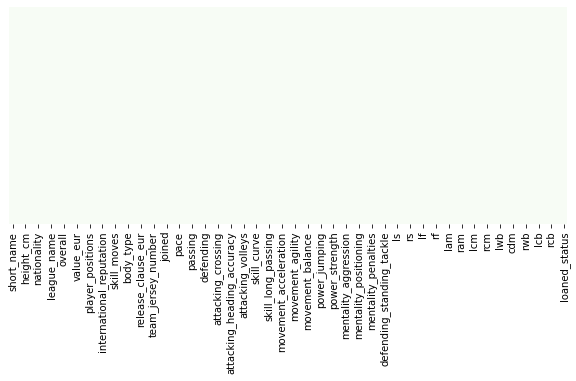

In [31]:
plt.figure(figsize=(10,4))
sns.heatmap(fifa_OP.isnull(),yticklabels=False,cbar=False,cmap='Greens')

<AxesSubplot:>

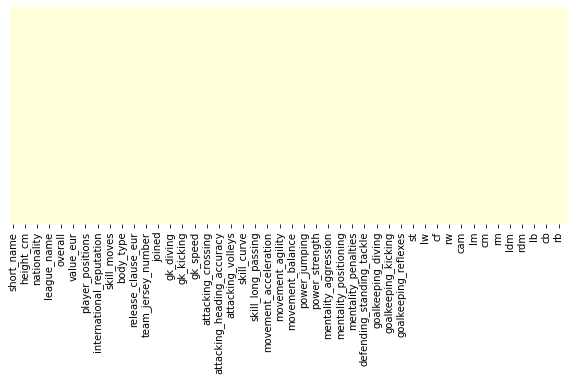

In [32]:
plt.figure(figsize=(10,4))
sns.heatmap(fifa_GK.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

# Exploratory Data Analysis

>Which country players are most valuable collectively                                                              
(Data is heavily skewed as most players in this dataset are from europian/UK and latin amerrica countries)

In [33]:
players = fifa_1['nationality'].value_counts().head(10)
players

England          1685
Germany          1189
Spain            1072
France            984
Argentina         936
Brazil            885
Japan             489
Netherlands       432
Italy             421
United States     378
Name: nationality, dtype: int64

Text(0.5, 0, 'Total value (in millions)')

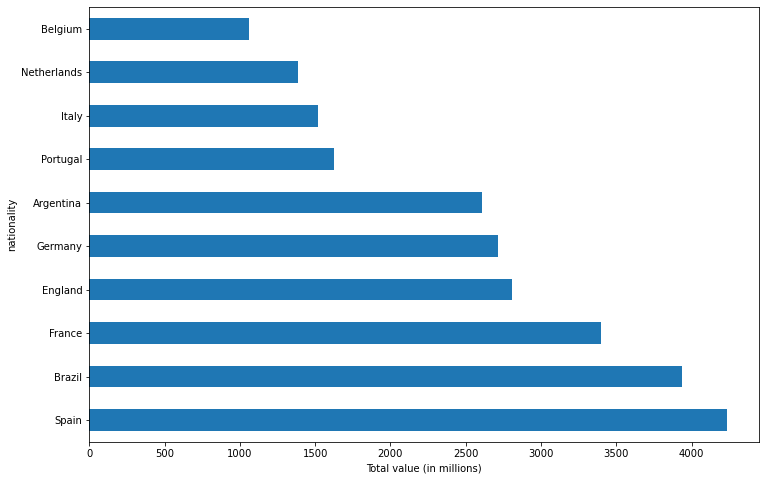

In [34]:
players_grouped_country=fifa_1.groupby('nationality')['value_eur'].sum()/1e6
players_grouped_country=players_grouped_country.sort_values(ascending=False).head(10)
players_grouped_country.plot(kind='barh',figsize=(12,8))
plt.xlabel("Total value (in millions)")

>Players in which age class are most valuable 

Text(0.5, 0, 'Age')

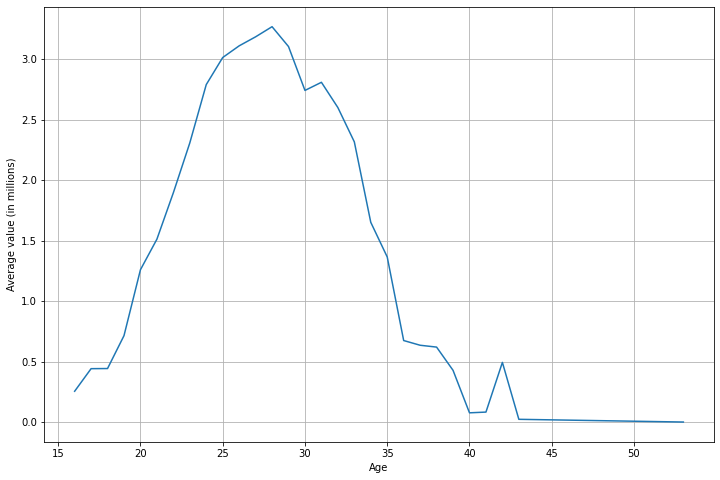

In [35]:
players_grouped_age=fifa_1.groupby('age')['value_eur'].mean()/1e6
players_grouped_age.plot(grid=True,figsize=(12,8))
plt.ylabel('Average value (in millions)')
plt.xlabel('Age')

> Top 10 players which has most potential to improve in upcoming seasons

In [36]:
fifa_potential=fifa_1[(fifa_1.potential>85 )& (fifa_1.overall<80)]
fifa_potential_ready=fifa_potential[(fifa_potential.overall<80)&(fifa_potential.overall>70)]
top_10 = fifa_potential_ready.head(10)

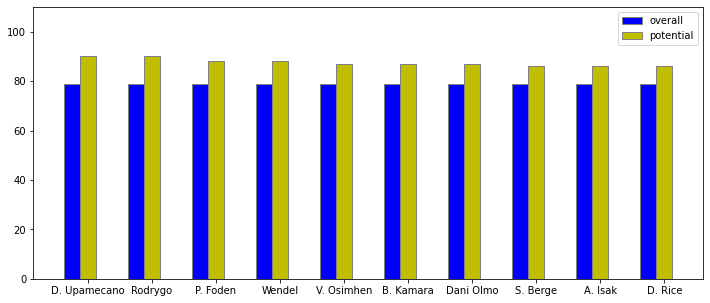

In [37]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 5))

br1 = np.arange(len(top_10))
br2 = [x + barWidth for x in br1]

plt.bar(br1, top_10.overall, color ='b', width = barWidth,
        edgecolor ='grey', label ='overall')
plt.bar(br2, top_10.potential, color ='y', width = barWidth,
        edgecolor ='grey', label ='potential')

plt.xticks([r + barWidth for r in range(len(top_10))],
        ['D. Upamecano', 'Rodrygo', 'P. Foden', 'Wendel', 'V. Osimhen','B. Kamara', 'Dani Olmo', 'S. Berge', 'A. Isak', 'D. Rice'])
plt.ylim([0, 110])
plt.legend(loc ='best')
plt.show()

> Top 10 clubs with highest average overall ratings (clubs contains players with high overall scores)

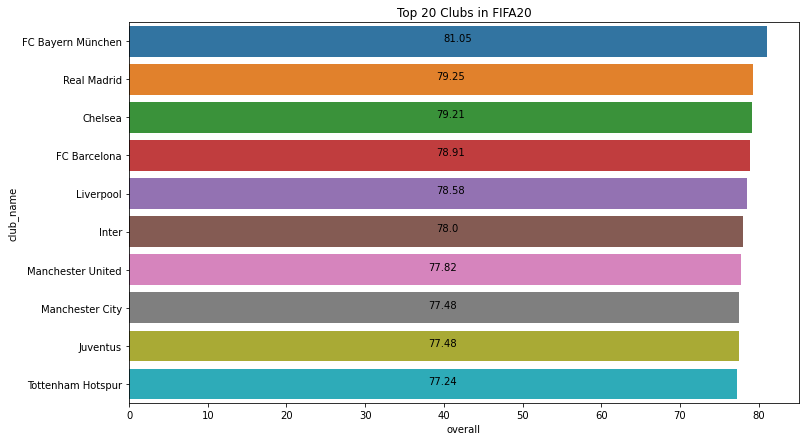

In [38]:
fig = plt.subplots(figsize =(12, 7))
top_clubs = fifa_1.groupby(['club_name']).overall.mean().sort_values(ascending  = False).head(10)
plt.title("Top 20 Clubs in FIFA20")
sns.barplot(y = top_clubs.index, x = top_clubs)
for index, value in enumerate(top_clubs):
    plt.text(value//2, index, str(round(value,2)))

### Conclusions from EDA
#### - Highest numbers of players in FIFA21 dataset are from England, Germany and Spain respectively
#### - Players from spanish nationality combined has the highest monetary value
#### - Players between the age of 25 and 30 has the higher monetary value as compared to other age groups
#### - D. Upamecano (fc bayern munich), Rodrygo (Real Madrid), P. Foden (Mancherter City) have the highest potential to be better players
#### - fc bayern munich has the highest average overall rated players

# Building a linear regression model on outfield players data

In [39]:
x= fifa_OP.drop(['short_name','value_eur','nationality','league_name','club_name','international_reputation','weak_foot','skill_moves','real_face','release_clause_eur',
                 'team_position','team_jersey_number','loaned_from','player_positions','preferred_foot','work_rate','body_type','joined','loaned_status','height_cm','weight_kg',
                 'mentality_composure','defending_standing_tackle'], axis = 1) 
y = fifa_OP['value_eur'] # Target

In [40]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3)

In [41]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(11666, 64) (5000, 64) (11666,) (5000,)


In [42]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = lm.predict(x_test)
y_pred

array([3237428.28100392,  881305.78656235, 8648267.55369818, ...,
       -104900.37622544, 1340776.79302931, 7332916.79154262])

In [44]:
from sklearn.metrics import  mean_absolute_error, r2_score, accuracy_score

In [45]:
y_train_pred = lm.predict(x_train)
print('Evaluation(training data) R^2:', r2_score(y_train, y_train_pred))

y_pred = lm.predict(x_test)
print('Actual Evaluation(testing data) R^2:', r2_score(y_test, y_pred))

Evaluation(training data) R^2: 0.7745296299257192
Actual Evaluation(testing data) R^2: 0.7529097228632877


In [46]:
y_train_pred = lm.predict(x_train)
print('Evaluation(training data) mean_absolute_error:', mean_absolute_error(y_train, y_train_pred))

y_pred = lm.predict(x_test)
print('Actual Evaluation(testing data) mean_absolute_error:', mean_absolute_error(y_test, y_pred))

Evaluation(training data) mean_absolute_error: 1272418.1969314527
Actual Evaluation(testing data) mean_absolute_error: 1309152.096139248


In [47]:
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
pd.set_option('display.max_rows', coeff_df.shape[0]+1)
coeff_df

,Coefficient
age,-169241.287134
league_rank,68080.003951
overall,244872.892790
potential,14312.879448
wage_eur,171.242663
contract_valid_until,111320.086358
pace,-7804.372563
shooting,-14856.316221
passing,-72876.779032
dribbling,29944.253107


# Building a linear regression model on goalkeepers data

In [48]:
p = fifa_GK.drop(['short_name','value_eur','nationality','league_name','club_name','international_reputation','weak_foot','skill_moves','real_face','release_clause_eur',
                 'team_position','team_jersey_number','loaned_from','player_positions','preferred_foot','work_rate','body_type','joined','loaned_status','height_cm','weight_kg',
                 'mentality_composure','defending_standing_tackle'], axis = 1) 
q = fifa_GK['value_eur'] # Target

In [49]:
p_train, p_test, q_train, q_test = train_test_split(p,
                                                    q,
                                                    test_size = 0.2)

In [50]:
lm_1 = LinearRegression()

lm_1.fit(p_train, q_train)

LinearRegression()

In [51]:
q_pred = lm_1.predict(p_test)
q_pred

array([-6.54698925e+05,  5.34645142e+06,  3.95892971e+05,  7.44659805e+06,
        2.99138977e+06,  2.06183700e+06, -1.51178405e+05,  9.40473655e+05,
       -7.77444488e+05,  1.36344851e+07,  4.11535624e+06, -9.62745015e+05,
       -1.60681156e+06,  1.25175542e+06,  5.69293946e+05, -3.70235775e+05,
        1.87873655e+06,  1.07759619e+06,  3.30751474e+05,  1.67743794e+06,
        2.89515771e+06, -9.08075214e+05,  2.40432334e+06,  3.03283778e+06,
        3.90871323e+06, -9.00629805e+05,  3.15727947e+06,  1.51503742e+06,
        2.07711508e+06,  3.17420086e+05,  1.36226952e+06, -1.45510176e+06,
        1.12791017e+06,  1.31206852e+06,  1.17745452e+07,  3.00804432e+05,
       -8.79244288e+05,  1.00591955e+07, -3.96293952e+05,  1.55491875e+06,
        8.37443342e+04, -8.61076482e+05,  1.44119555e+06,  1.04721586e+06,
        1.01514741e+07, -6.20161404e+05,  9.70530835e+06, -4.06731000e+05,
        4.11049687e+05,  1.16592669e+07, -1.33846325e+06,  1.16945358e+06,
       -5.39006664e+05,  

In [52]:
q_train_pred = lm_1.predict(p_train)
print('Evaluation(training data) R^2:', r2_score(q_train, q_train_pred))

q_pred = lm_1.predict(p_test)
print('Actual Evaluation(testing data) R^2:', r2_score(q_test, q_pred))

Evaluation(training data) R^2: 0.7961511236182253
Actual Evaluation(testing data) R^2: 0.578506809040546


In [53]:
q_train_pred = lm_1.predict(p_train)
print('Evaluation(training data) mean_absolute_error:', mean_absolute_error(q_train, q_train_pred))

q_pred = lm_1.predict(p_test)
print('Actual Evaluation(testing data) mean_absolute_error:', mean_absolute_error(q_test, q_pred))

Evaluation(training data) mean_absolute_error: 1162687.2481823405
Actual Evaluation(testing data) mean_absolute_error: 1170134.1187484628


In [54]:
coeff_df_1 = pd.DataFrame(lm_1.coef_, p.columns, columns=['Coefficient'])
pd.set_option('display.max_rows', coeff_df_1.shape[0]+1)
coeff_df_1

,Coefficient
age,-183488.990154
league_rank,85377.076806
overall,574076.367869
potential,-30808.796438
wage_eur,231.436675
contract_valid_until,42786.895368
gk_diving,-50288.611959
gk_handling,-22057.861919
gk_kicking,51387.957027
gk_reflexes,-50035.420997
